In [413]:
# Numpy import
import numpy as np

# Notebook tools
from IPython.display import display, HTML

# Seaborn import
import seaborn as sbs

# Matplotlib import
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Pandas imports
import pandas as pd

# Sklearn imports

from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA, DictionaryLearning
from sklearn.preprocessing import normalize

## Classifiers

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Regressors

from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [157]:
def print_cross_val(clf, x, y, cv_):
    scores = cross_val_score(clf, x, y, cv=cv_, scoring='f1',n_jobs=4)

    print("F1 Score: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

In [234]:
def print_r2_score(rgf, dataset):
    (x_train, x_test, y_train, y_test) = dataset
    
    reg = rgf.fit(x_train, y_train)

    print("R^2 Score: %0.2f\n" % (reg.score(x_test, y_test)))

In [369]:
def plot_predictions(rgf, dataset):
    (x_train, x_test, y_train, y_test) = dataset
    
    color_pred = 'red'
    color_actual = 'green'
    limit = 20
    
    start_point = np.random.randint(0, len(x_test) - limit)
    end_point = start_point + limit
    
    br.fit(x_train, y_train)

    pred_patch = mpatches.Patch(color=color_pred, label='Predicted data')
    actual_patch = mpatches.Patch(color=color_actual, label='Actual data')

    plt.legend(handles=[pred_patch, actual_patch])
    
    plt.plot(np.arange(0, limit), y_test[start_point:end_point], color= color_actual)
    plt.plot(np.arange(0, limit), br.predict(x_test)[start_point:end_point], color = color_pred)
    
    plt.show()

In [196]:
def to_label(y):
    y_out = []
    
    for y_ in y:
        if y_ >= 0.5:
            y_out.append(1)
        else:
            y_out.append(0)
    
    return np.array(y_out)

# Loading Data

In [173]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

display(df.head())
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data Histogram

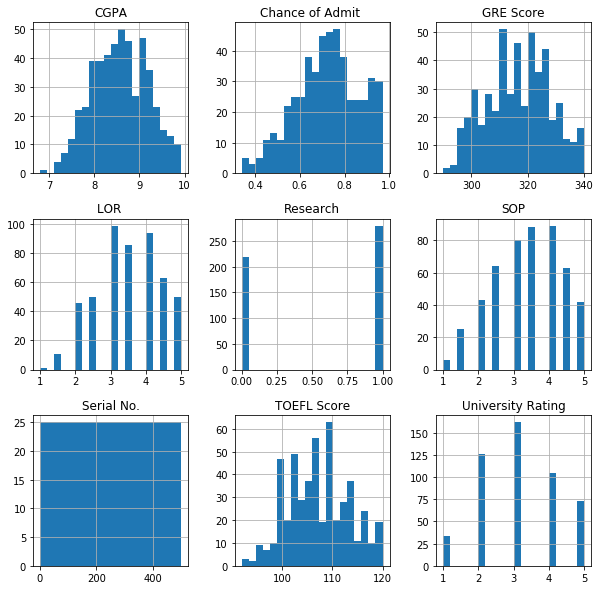

In [183]:
df.hist(bins=20, figsize=(10, 10)) 

plt.show()

# Data Correlation

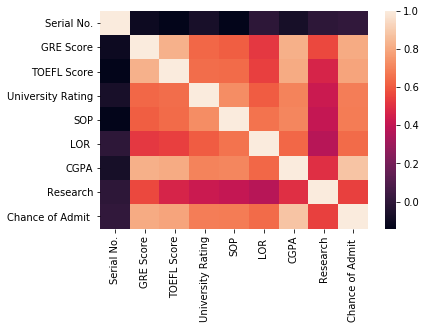

In [172]:
sbs.heatmap(df.corr())
plt.show()

# Preparing Dataset

In [414]:
data_raw = np.array(df)

x = data_raw[:, 1:8]
x_norm = normalize(x)

y_continuous = data_raw[:, 8]
y_discrete = to_label(y_continuous)

# Testing Classifiers

In [429]:
algs = [
        (LogisticRegression(n_jobs=4, solver='lbfgs'), 'Logistic Regression'),
        (GaussianNB(), 'Naive Bayes'),
        (RandomForestClassifier(n_jobs=4, n_estimators=150), 'Random Forest (150 trees)'),
        (SVC(kernel='linear'), 'Support Vector Machine (Linear Kernel)'),
        (GaussianProcessClassifier(kernel=RBF(1)), 'Gaussian Process'),
        (KNeighborsClassifier(n_jobs=4, n_neighbors=5), 'K-Nearest Neighbors (K = 5)'),
        (AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=300), 'Boosted Decision Trees (w/ AdaBoost)'),
        (SGDClassifier(max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=0.001), 'Stochastic Gradient Descent Classifier (SGD)')
       ]

In [430]:
n = 3

print("Testing w/ {}-fold cross validation\n".format(n))

for a in algs:
    print(a[1])
    print_cross_val(a[0], x, y_discrete, n)

Testing w/ 3-fold cross validation

Logistic Regression
F1 Score: 0.96 (+/- 0.01)

Naive Bayes
F1 Score: 0.91 (+/- 0.04)

Random Forest (150 trees)
F1 Score: 0.97 (+/- 0.01)

Support Vector Machine (Linear Kernel)
F1 Score: 0.96 (+/- 0.02)

Gaussian Process
F1 Score: 0.96 (+/- 0.00)

K-Nearest Neighbors (K = 5)
F1 Score: 0.97 (+/- 0.01)

Boosted Decision Trees (w/ AdaBoost)
F1 Score: 0.96 (+/- 0.01)

Stochastic Gradient Descent Classifier (SGD)
F1 Score: 0.95 (+/- 0.03)



# Testing Regressors

In [449]:
x_train, x_test, y_train, y_test = train_test_split(x, y_continuous, test_size = 0.2)
dataset = (x_train, x_test, y_train, y_test)

algs_dis = [
            (LinearRegression(n_jobs = 4), 'Linear Regression (Least Squares)'),
            (BayesianRidge(), 'Bayesian Ridge Regression'),
            (RandomForestRegressor(n_jobs=4, n_estimators=150), 'Random Forest (150 trees)'),
            (SVR(kernel='rbf', gamma='scale'), 'Support Vector Machine'),
            (AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=200), 'Boosted Decision Trees (w/ AdaBoost)' ),
            (KNeighborsRegressor(n_jobs=4, n_neighbors=3), 'K-Nearest Neighbors (K = 5)'),
            (SGDRegressor(max_iter=2000, tol=1e-4, learning_rate='adaptive', eta0=0.0001), 'Stochastic Gradient Descent') 
]

Testing Regressors

Linear Regression (Least Squares)
R^2 Score: 0.86



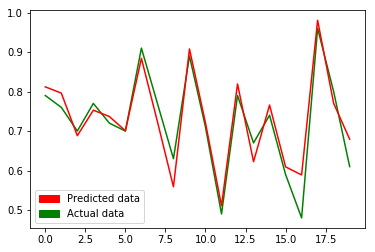

Bayesian Ridge Regression
R^2 Score: 0.86



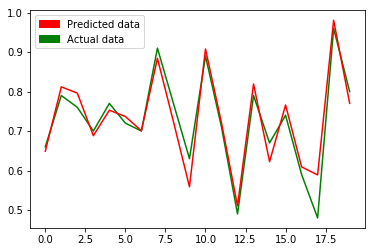

Random Forest (150 trees)
R^2 Score: 0.85



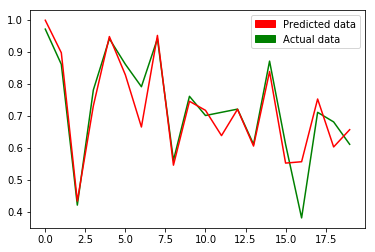

Support Vector Machine
R^2 Score: 0.76



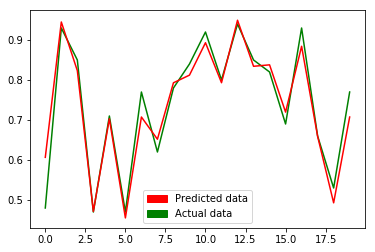

Boosted Decision Trees (w/ AdaBoost)
R^2 Score: 0.80



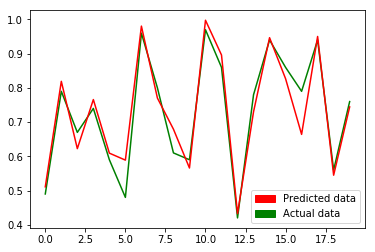

K-Nearest Neighbors (K = 5)
R^2 Score: 0.76



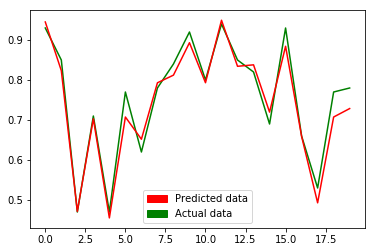

Stochastic Gradient Descent
R^2 Score: -964145024599612063744.00



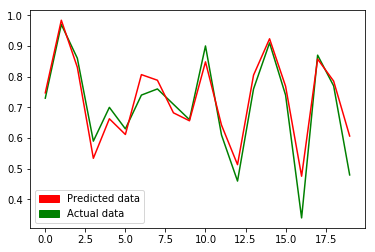

In [450]:
print("Testing Regressors\n")

for a in algs_dis:
    print(a[1])
    print_r2_score(a[0], dataset)
    plot_predictions(a[0], dataset)

In [418]:
rf = RandomForestClassifier(n_jobs=4, n_estimators=150)
rf.fit(x, y_discrete)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

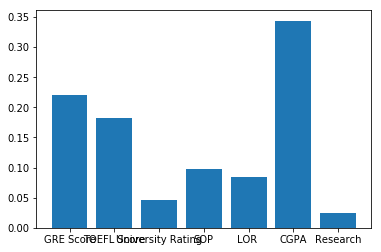

In [419]:
plt.bar(df.columns[1:8], rf.feature_importances_)
plt.show()


In [407]:
df.columns[0]

'Serial No.'